<a href="https://colab.research.google.com/github/sreeradham/Data-Science-and-Analytics-ICT-course/blob/main/model_selection_%26_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/sample_data/titanic_dataset.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.set_index('PassengerId', inplace=True)

Check the basic details of the dataset

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Fill in all the missing values present in all the columns in the dataset

In [ ]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

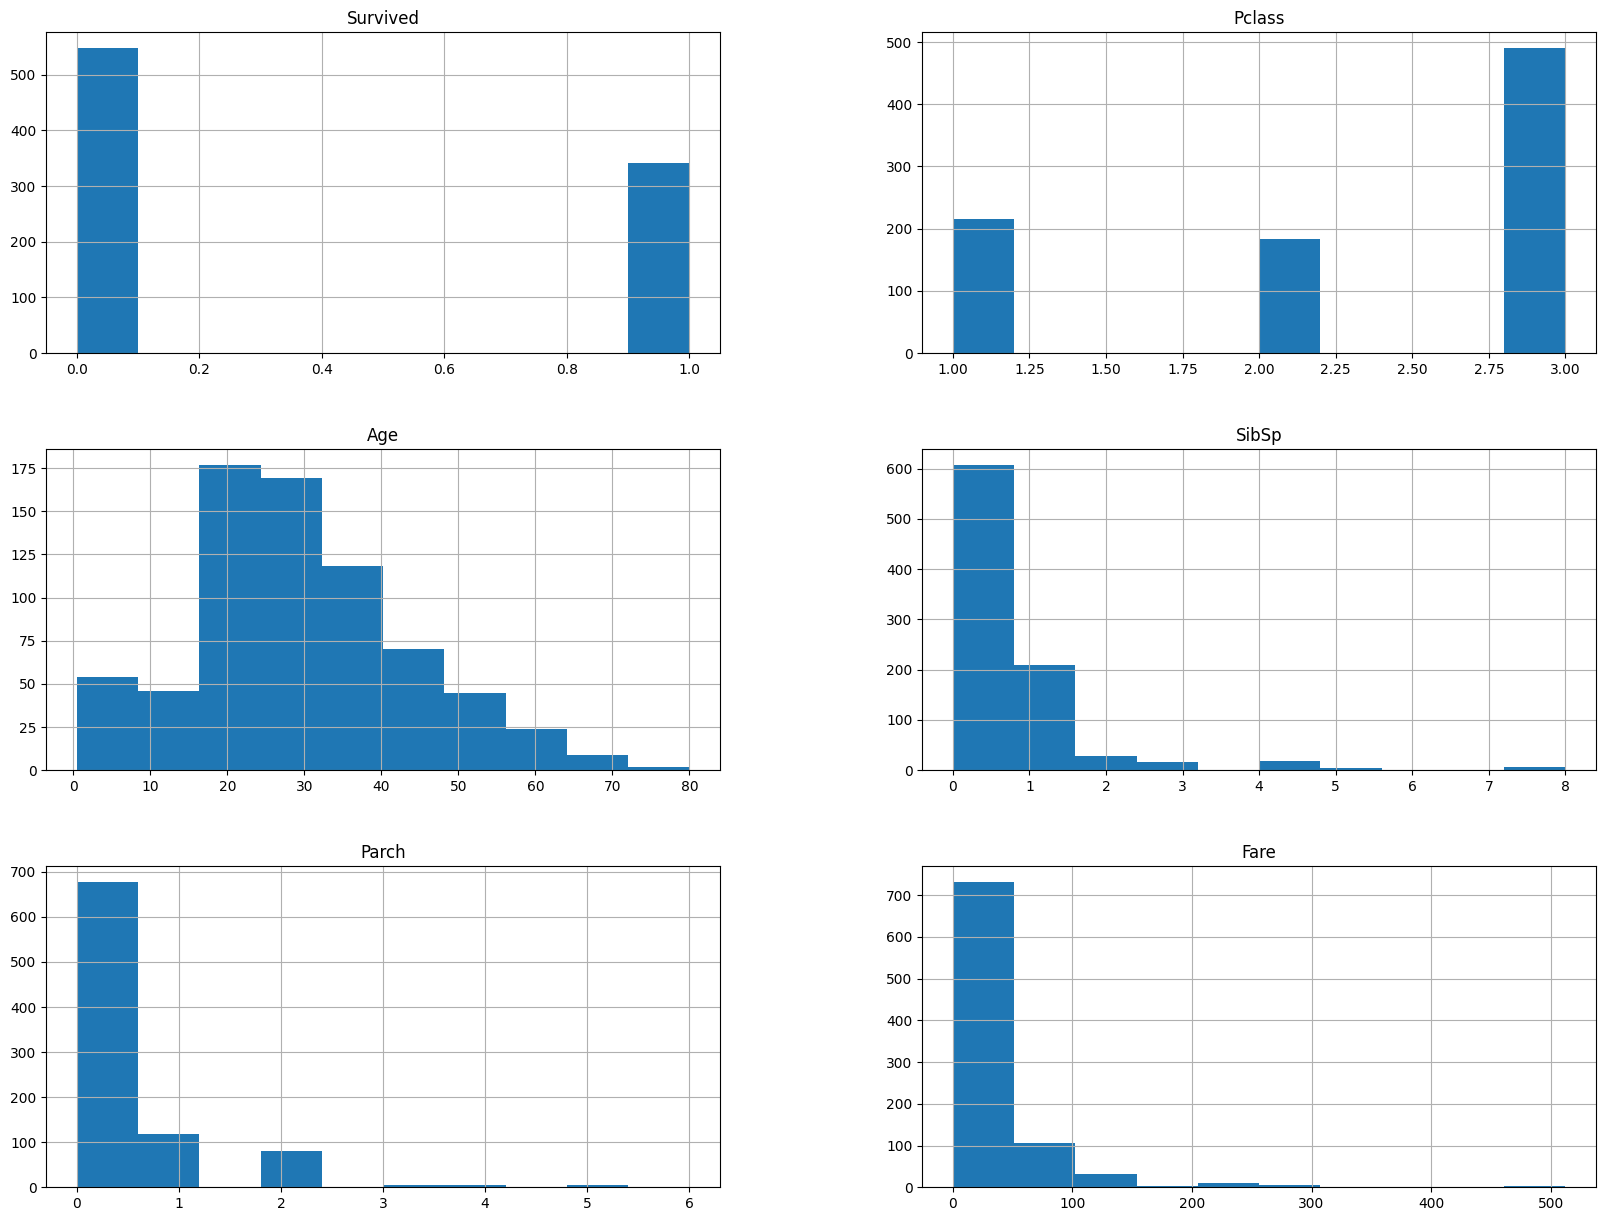

In [ ]:
data.hist(figsize=(20,15))
plt.show()

In [ ]:
#none are ND, therefore use medians and modes
for i in ['Age']:
    data[i]= data[i].fillna(data[i].median())

In [ ]:
for i in ['Cabin','Embarked']:
    data[i]= data[i].fillna(data[i].mode()[0])

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:

box=data.select_dtypes(include=['float','int'])

In [ ]:
box.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<ipython-input-19-a8ffc5c0e170>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,j)


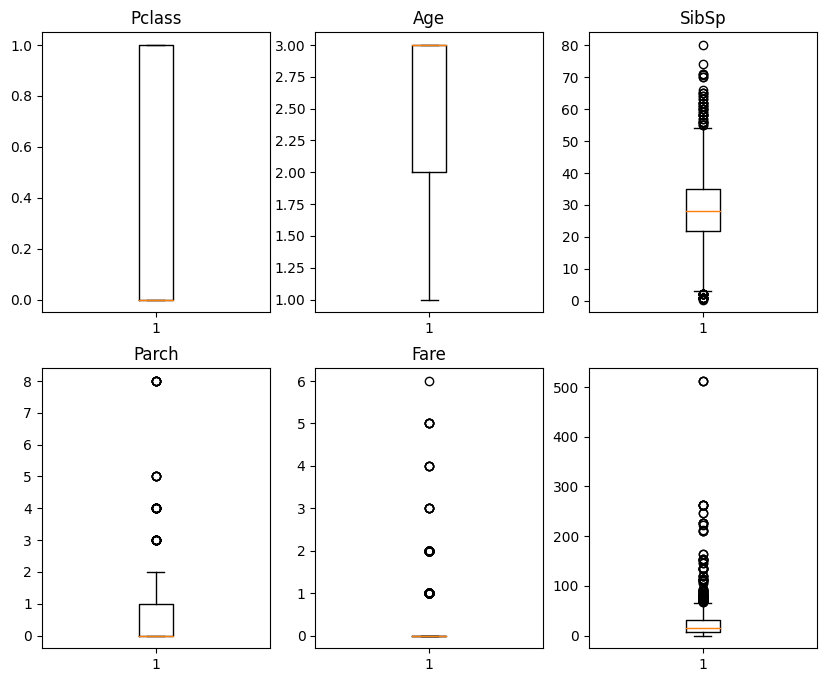

In [ ]:
plt.figure(figsize=(10,8))
j=1
for i in ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    plt.title(i)
    plt.subplot(2,3,j)
    plt.boxplot(box[i])
    j=j+1
plt.show()

In [ ]:
#we change sibsp, parch, fair
data.shape

(891, 11)

In [ ]:
for i in ['SibSp', 'Parch', 'Fare']:
    Q1= np.percentile(data[i],25, interpolation='midpoint')
    Q2= np.percentile(data[i],50, interpolation='midpoint')
    Q3= np.percentile(data[i],75, interpolation='midpoint')
    if Q2== data[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in data[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= data[i]>up_lim
        ind3= data[i]<low_lim
        indicestodrop2= data.loc[ind2].index
        indicestodrop3= data.loc[ind3].index
        data= data.drop(indicestodrop2)
        data= data.drop(indicestodrop3)
    else:
        print('check again')
data.shape

<ipython-input-21-77fa3a42e099>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1= np.percentile(data[i],25, interpolation='midpoint')
<ipython-input-21-77fa3a42e099>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2= np.percentile(data[i],50, interpolation='midpoint')
<ipython-input-21-77fa3a42e099>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3= np.percentile(data[i],75, 

(591, 11)

Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
data2= pd.get_dummies(data)

In [ ]:
data2.shape

(591, 1219)

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  591 non-null    int64  
 1   Pclass    591 non-null    int64  
 2   Name      591 non-null    object 
 3   Sex       591 non-null    object 
 4   Age       591 non-null    float64
 5   SibSp     591 non-null    int64  
 6   Parch     591 non-null    int64  
 7   Ticket    591 non-null    object 
 8   Fare      591 non-null    float64
 9   Cabin     591 non-null    object 
 10  Embarked  591 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 55.4+ KB


In [ ]:
data['Name'].nunique()

591

In [ ]:
data['Ticket'].nunique()

549

In [ ]:
data['Cabin'].nunique()

68

In [ ]:
data['Embarked'].nunique()


3

In [ ]:
#now drop and create dummies
data2= data.drop(['Name','Ticket','Cabin'], axis=1)

In [ ]:
data2= pd.get_dummies(data2)

In [ ]:
data2.shape

(591, 11)

In [ ]:
data.isna().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
#after encoded data
y = data2['Survived']
X = data2.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

#R square should be close to 1, mse should be minimum
from sklearn.metrics import mean_squared_error, r2_score
print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MSE is:  0.1550870212763082
R squared value is:  0.26499755411854076


In [ ]:
#now scale the data and see if it's the same values
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,591.000000,591.000000,591.000000,591.0,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,2.478849,30.854484,0.181049,0.0,14.096932,0.241963,0.758037,0.137056,0.113367,0.749577
std,0.745024,11.091567,0.431057,0.0,10.722304,0.428635,0.428635,0.344198,0.317310,0.433624
min,1.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.750000,0.000000,0.0,7.775000,0.000000,1.000000,0.000000,0.000000,0.500000
50%,3.000000,28.000000,0.000000,0.0,8.662500,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,34.000000,0.000000,0.0,15.800000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,2.000000,0.0,53.100000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#remove categorical data in scaling
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 1 to 891
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      591 non-null    int64  
 1   Age         591 non-null    float64
 2   SibSp       591 non-null    int64  
 3   Parch       591 non-null    int64  
 4   Fare        591 non-null    float64
 5   Sex_female  591 non-null    uint8  
 6   Sex_male    591 non-null    uint8  
 7   Embarked_C  591 non-null    uint8  
 8   Embarked_Q  591 non-null    uint8  
 9   Embarked_S  591 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 30.6 KB


In [ ]:
#take X1 as dropped X with no categorical data for scaling purposes
X1= X.drop(['Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S','Pclass', 'Parch','SibSp'], axis=1)

In [ ]:
X1.isna().sum()

Age     0
Fare    0
dtype: int64

In [ ]:
X.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
X1.columns

Index(['Age', 'Fare'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler(feature_range=(0,1))

#min_max for minmaxscaling
X1 = min_max.fit_transform(X1)
X1 = pd.DataFrame(X1,columns=['Age', 'Fare'])
X.drop(['Age', 'Fare'],axis=1,inplace=True)
#using something cleaner, so it becomes alligned, both indices are reset
#then alligned
X = pd.concat([X.reset_index(drop=True), X1.reset_index(drop=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MSE is:  0.15439073578650211
R squared value is:  0.2682974533224042


KNN

In [ ]:
df=data
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q


In [ ]:
df['Survived'].value_counts()

0    424
1    167
Name: Survived, dtype: int64

In [ ]:
df = data.drop(['Name', 'Ticket','Parch'], axis=1)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,7.2500,B96 B98,S
3,1,3,female,26.0,0,7.9250,B96 B98,S
4,1,1,female,35.0,1,53.1000,C123,S
5,0,3,male,35.0,0,8.0500,B96 B98,S
6,0,3,male,28.0,0,8.4583,B96 B98,Q


In [ ]:
#now to encode for modelling
df=pd.get_dummies(df)

In [ ]:
df.shape

(591, 78)

In [ ]:
X= df.drop('Survived', axis=1)
y= df['Survived']

In [ ]:
#kNN model!
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

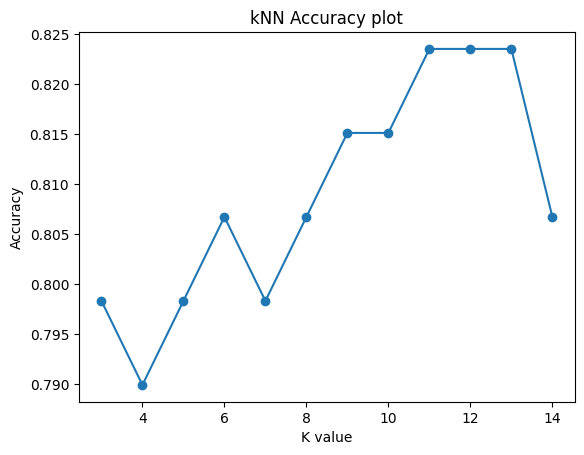

In [ ]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8235294117647058

In [ ]:
confusion_matrix(y_test, y_pred)

array([[76,  7],
       [14, 22]])

svm


In [ ]:
#linear, conveniently same as logistic 🤔
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7899159663865546

In [ ]:
svmclf= SVC(kernel='poly')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7899159663865546

In [ ]:
svmclf= SVC(kernel='rbf')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7899159663865546

k-fold cross validation

In [ ]:

from sklearn.model_selection import KFold

#10 fold cross validator
kfold_validator=KFold(10)

#which data is being split, splitting in continuous manner
for train_index, test_index in kfold_validator.split(X,y):
    print('Training Index', train_index)
    print('Testing Index', test_index)

Training Index [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302

knn

In [ ]:
#created 10 models
#to check accuracy of each model
from sklearn.model_selection import cross_val_score

#we have to use knn, svm, random forest etc, not just LR
cv_result= cross_val_score(classifier,X,y, cv=kfold_validator)

#clearly very unstable for different values,because data imbalanced
print('cv result: ',cv_result)

print('mean: ', np.mean(cv_result))

cv result:  [0.71666667 0.76271186 0.71186441 0.6779661  0.71186441 0.71186441
 0.74576271 0.76271186 0.74576271 0.76271186]
mean:  0.7309887005649717


svm


In [ ]:
from sklearn.model_selection import cross_val_score

cv_result= cross_val_score(svmclf,X,y, cv=kfold_validator)
print('cv result: ',cv_result)

print('mean: ', np.mean(cv_result))

cv result:  [0.6        0.79661017 0.74576271 0.62711864 0.66101695 0.79661017
 0.6779661  0.72881356 0.79661017 0.74576271]
mean:  0.7176271186440677


stratified k-cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

#difference to k fold
skfold_validator=StratifiedKFold(n_splits=10)

#not same order, fits for proportion
for train_index, test_index in skfold_validator.split(X,y):
    print('Training Index', train_index)
    print('Testing Index', test_index)


Training Index [ 40  41  45  53  55  56  58  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302

knn

In [ ]:
skcv_result= cross_val_score(classifier,X,y, cv=skfold_validator)

#stable!
print('result: ',skcv_result)

print('mean score: ',np.mean(skcv_result))

result:  [0.76666667 0.74576271 0.6779661  0.74576271 0.76271186 0.69491525
 0.6779661  0.74576271 0.72881356 0.72881356]
mean score:  0.7275141242937854


svm


In [ ]:
cv_result= cross_val_score(svmclf,X,y, cv=kfold_validator)

print('cv result: ',cv_result)

print('mean: ', np.mean(cv_result))

cv result:  [0.6        0.79661017 0.74576271 0.62711864 0.66101695 0.79661017
 0.6779661  0.72881356 0.79661017 0.74576271]
mean:  0.7176271186440677
